# SLU03-Visualization with Pandas & Matplotlib: Exercise notebook

In this notebook you will practice the following:

- Scatterplots
- Line charts
- Bar charts
- Histograms
- Box plots
- Scaling plots

To learn about data visualization, we are going to use a modified version of [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) which has information about movies

The dataset is located at `data/movies.csv`, and has the following fields

```
    budget: Movie budget (in $).
    genre: Genre the movie belongs to.
    original_language: Language the movie was originally filmed in.
    production_company: Name of the production company.
    production_country: Country where the movie was produced.
    release_year: Year the movie was released.
    revenue: Movie ticket sales (in $).
    runtime: Movie duration (in minutes).
    title: Movie title.
    vote_average: Average rating in MovieLens.
    vote_count: Number of votes in MovieLens.
    release_year: Year the movie was released
```

In [10]:
import pandas as pd
import numpy as np

In [11]:
movies = pd.read_csv("data/movies.csv")

In [12]:
movies.shape

(756, 11)

In [13]:
movies.head()

,budget,genre,original_language,production_company,production_country,revenue,runtime,title,vote_average,vote_count,release_year
0,3500000.0,Comedy,en,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0,1995.0
1,12000000.0,Comedy,en,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0,1996.0
2,31000000.0,Comedy,en,United Artists,United States of America,185260553.0,117.0,The Birdcage,6.7,303.0,1996.0
3,52000000.0,Drama,en,Imagine Entertainment,United States of America,355237933.0,140.0,Apollo 13,7.3,1637.0,1995.0
4,2000000.0,Comedy,en,Miramax Films,United States of America,1275000.0,83.0,Blue in the Face,6.8,28.0,1995.0


Import matplotlib, pyplot and the matplotlib inline magic.

In [14]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
assert plt

Change the default chart size to 8 inches width and 8 inches height

In [16]:
# YOUR CODE HERE
plt.rcParams["figure.figsize"] = [8, 8]

In [17]:
assert plt.rcParams["figure.figsize"][0] == 8
assert plt.rcParams["figure.figsize"][1] == 8

<hr>

### Note about the grading

Grading plots is difficult, we are using `plotchecker` to grade the plots with nbgrader. 
For `plotchecker` to work with nbgrader, we need to add on each cell, the line

`axis = plt.gca();`

<div class="alert alert-danger">
<b>NOTE:</b>If you get the ImportError, plotchecker not defined, make sure you activate the right environment for this unit!
</div>

**After the code required to do the plot**.

For example, if we want to plot a scatter plot showing the relationship between revenue and runtime we would do as follows:

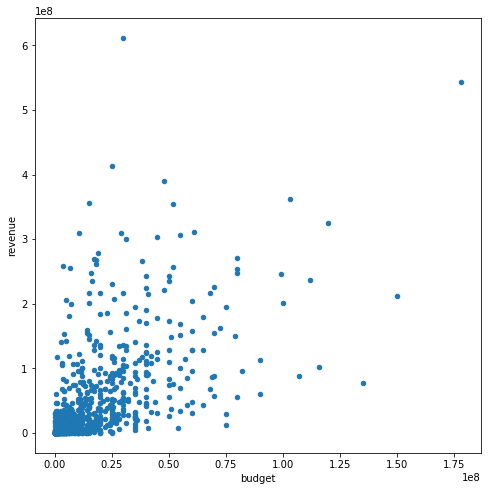

In [18]:
# code required to plot
movies[["budget", "revenue"]].plot.scatter(x="budget",y="revenue" )

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

<hr>

### How does the vote count correlate with the revenue?

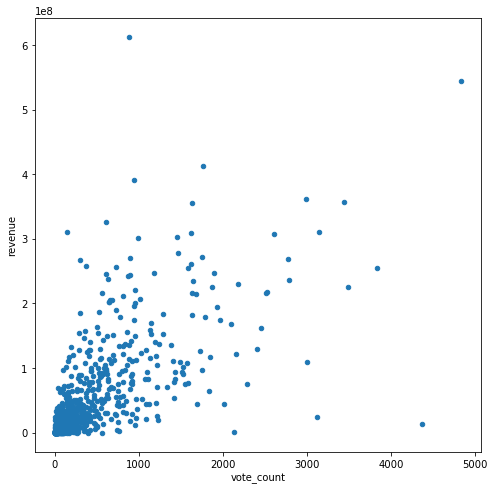

In [27]:
# YOUR CODE HERE

movies[["vote_count", "revenue"]].plot.scatter(x="vote_count",y="revenue" )


axis = plt.gca();

In [28]:
from plotchecker import PlotChecker
def get_data(p, ax=0):
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

pc = PlotChecker(axis)
data = get_data(pc)
assert len(data) == 707
assert set([pc.xlabel] + [pc.ylabel]) == set(["revenue", "vote_count"])
np.testing.assert_equal(get_data(pc,1), movies[movies.revenue.notnull()].revenue)
print("Success!")

Success!


### How does the average revenue of movies evolves over time? Set the plot title to "Average Movie Revenue by year" 

To calculate the average revenue by year we need to perform an [aggregation](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), pandas support this by doing a technique called [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). This will be explained in the Data Wrangling Specialization.

For now we will do the grouping for you:

<div class="alert alert-danger">
<b>NOTE:</b>Make sure you use the dataframe named avg_revenue_by_year for the next exercise
</div>

In [96]:
avg_revenue_by_year = movies.groupby("release_year")["revenue"].mean().reset_index()
avg_revenue_by_year.columns = ["release_year", "avg_revenue"]
avg_revenue_by_year.head()

,release_year,avg_revenue
0,1951.0,3.616667e+06
1,1952.0,8.000000e+06
2,1953.0,1.850000e+07
3,1955.0,5.000000e+00
4,1956.0,8.880000e+06


Text(0.5, 1.0, 'Average Movie Revenue by year')

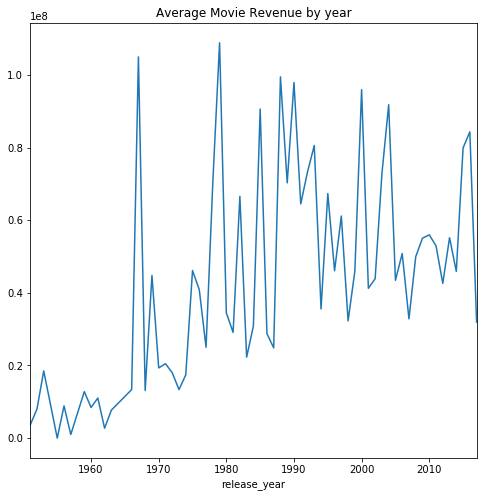

In [99]:
# YOUR CODE HERE
avg_revenue_by_year_indexed = avg_revenue_by_year.set_index("release_year")
avg_revenue_by_year_indexed.avg_revenue.plot()
plt.title( "Average Movie Revenue by year")


In [100]:
pc = PlotChecker(axis)
np.testing.assert_equal(get_data(pc), sorted(movies[movies.runtime.notnull()].release_year.unique()))
np.testing.assert_equal(get_data(pc, ax=1), movies.groupby("release_year")["revenue"].mean())

assert set([pc.xlabel] + [pc.ylabel]) == set(["release_year", "revenue"])
pc.assert_title_equal("Average Movie Revenue by year")
print("Success!")

AssertionError: 
Arrays are not equal

(shapes (707,), (63,) mismatch)
 x: array([5.130e+02, 7.670e+02, 3.030e+02, 1.637e+03, 2.800e+01, 6.430e+02,
       1.400e+01, 9.000e+00, 4.640e+02, 7.690e+02, 1.894e+03, 9.100e+01,
       2.800e+01, 2.510e+02, 1.800e+02, 2.020e+02, 1.019e+03, 9.900e+01,...
 y: array([1951., 1952., 1953., 1955., 1956., 1957., 1959., 1960., 1961.,
       1962., 1963., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,...

### How does the median revenue vary by movie genre? Label the x-axis as "Median Revenue"

Again, we will do the grouping for you:

In [ ]:
median_revenue_by_genre = movies.groupby("genre")["revenue"].median().reset_index()
median_revenue_by_genre.columns = ["genre", "median_revenue"]
median_revenue_by_genre

<div class="alert alert-danger">
<b>NOTE:</b>Make sure you use the dataframe named median_revenue_by_genre for the next exercise
</div>

In [ ]:
# YOUR CODE HERE
median_revenue_by_genre.plot.barh(x = "Median Revenue")

axis = plt.gca();

In [ ]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])
assert len(pc._patches) == len(movies.groupby("genre").groups)
np.testing.assert_equal(pc.widths, movies.groupby("genre")["revenue"].median().values)
pc.assert_xlabel_equal("Median Revenue")
print("Success!")

### How is the variable vote_average distributed? (set the x axis limit to [0, 9] and the number of bins to 10. Change the bar color to `red`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
axis = plt.gca();

In [ ]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

np.testing.assert_allclose(pc.heights, [  5.,   1.,   1.,   8.,  14.,  58., 202., 231., 172.,  20.])
np.testing.assert_allclose(pc.widths, [0.86 for i in range(len(pc.widths))])
assert pc.xlim[1] == 9
assert pc._patches[0].get_facecolor() == (1., 0., 0., 1.)
print("Success!")

### Change the default plot style to `ggplot`. Make a plot that displays the vote count broken by movie language and that allows us to check if there are outliers.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
axis = plt.gca();

In [ ]:
pc = PlotChecker(axis)
pc._lines = pc.axis.get_lines()
pc.colors = np.array([pc._color2rgb(x.get_color()) for x in pc._lines])
np.testing.assert_allclose(pc.colors[0],[0.88627451, 0.29019608, 0.2])
np.testing.assert_allclose(pc.yticks,np.array([-1,0,1,2,3,4,5,6])*1e3)
assert pc.xticklabels == ['en', 'fr', 'hi', 'it', 'ru']
print("Success!")


# Ungraded Exercise
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of x in general?
* Are there any outlier in any of the fields?
* Which 2 charts better represent the underlying data?. Change their style to `bmh` and add titles to each chart explaining them 
